# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Data

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


New column called "text "length which is the number of words in the text column.

In [7]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

In [9]:
sns.set_style('white')

Creating a grid of 5 histograms of text length based off the star ratings

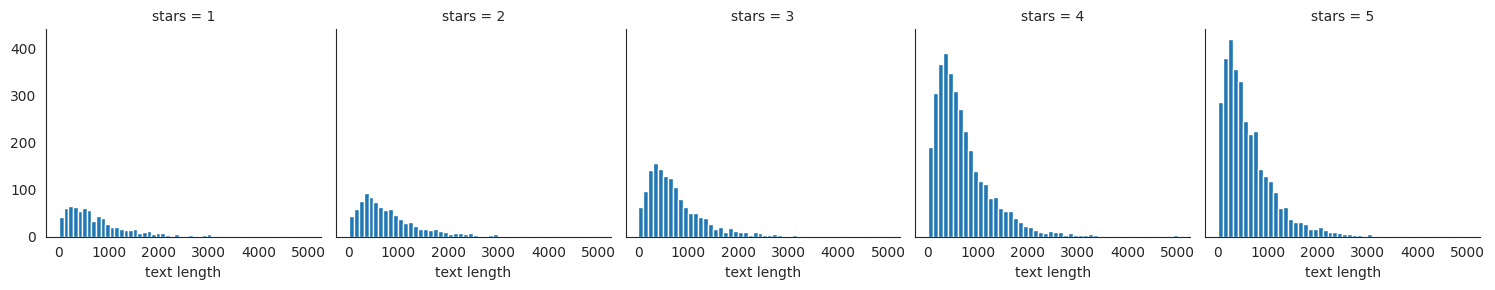

In [12]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist,'text length', bins=50)

Creating a boxplot of text length for each star category

<ipython-input-14-5193f715f466>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')


<Axes: xlabel='stars', ylabel='text length'>

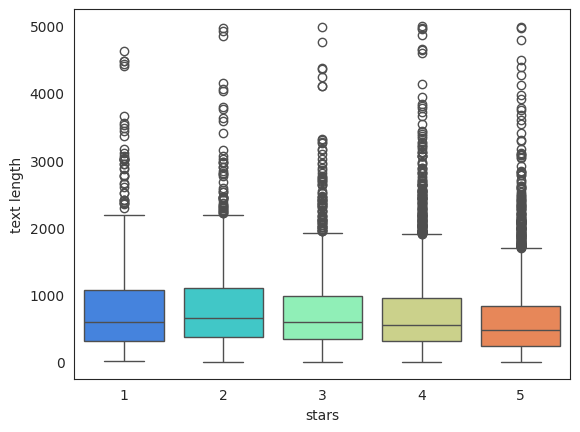

In [14]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

Creating a countplot of the number of occurences for each type of star rating

<ipython-input-15-2c80ab01d4b4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=yelp, palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

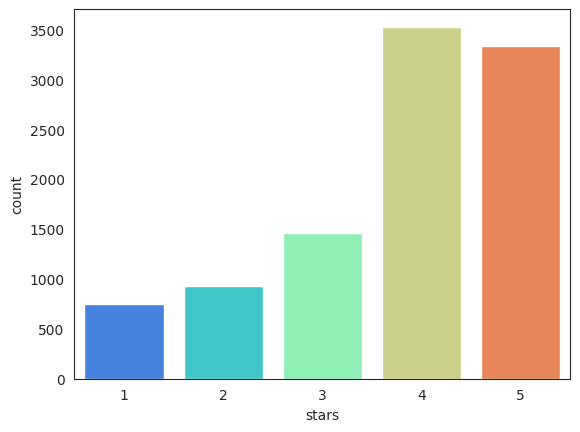

In [15]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

Getting the mean values of the numerical columns

In [18]:
numeric_cols = yelp.select_dtypes(include=['number']).columns #selecting only numeric columns

stars = yelp.groupby('stars')[numeric_cols].mean()
print(stars)

       stars      cool    useful     funny  text length
stars                                                  
1        1.0  0.576769  1.604806  1.056075   826.515354
2        2.0  0.719525  1.563107  0.875944   842.256742
3        3.0  0.788501  1.306639  0.694730   758.498289
4        4.0  0.954623  1.395916  0.670448   712.923142
5        5.0  0.944261  1.381780  0.608631   624.999101


Creating another dataframe

In [19]:
stars.corr()

,stars,cool,useful,funny,text length
stars,1.000000,0.964758,-0.761288,-0.950389,-0.950171
cool,0.964758,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.761288,-0.743329,1.000000,0.894506,0.699881
funny,-0.950389,-0.944939,0.894506,1.000000,0.843461
text length,-0.950171,-0.857664,0.699881,0.843461,1.000000


Creating a heatmap based off that corr() dataframe

<Axes: >

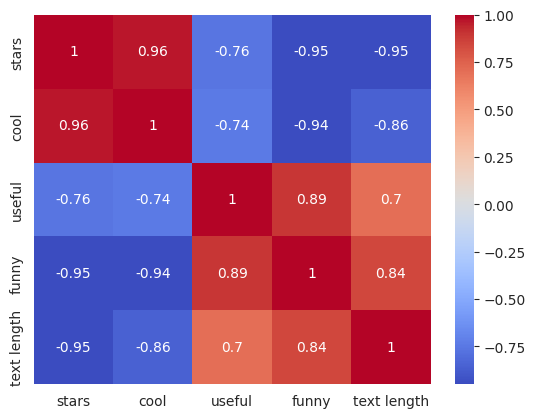

In [20]:
sns.heatmap(stars.corr(),cmap='coolwarm', annot=True)

# NLP Classification

To make things a little easier, we only grab reviews that were either 1 star or 5 star

In [21]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [22]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Our features and target/labels)

In [23]:
X = yelp_class['text']
y = yelp_class['stars']

Importing CountVectorizer and creating a CountVectorizer object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Using the fit_transform method on the CountVectorizer object and passing in X (the 'text' column). Then we save this result by overwriting X.

In [26]:
X = cv.fit_transform(X) # Converts each document into a vector of word counts based on the vocabulary. The result is a sparse matrix where rows represent documents and columns represent the presence (and frequency) of words.

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Training a Model

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
nb.fit(X_train, y_train)

MultinomialNB()

# Predictions and Evaluations

In [31]:
predictions = nb.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Using Text Processing

In [35]:
from sklearn.feature_extraction.text import  TfidfTransformer # TfidfTransformer converts a count matrix to a normalized TF-IDF representation, highlighting the importance of terms in relation to their frequency and distribution across a document set.

In [37]:
from sklearn.pipeline import Pipeline

Creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# Using the Pipeline

Time to use the pipeline! This pipeline has all our pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text

**Train Test Split**

In [39]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

Fitting the pipeline to the training data. Remember we can't use the same training data because that data has already been vectorized. We need to pass in just the text and labels.

In [40]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

# Predictions and Evaluations

In [41]:
predictions = pipeline.predict(X_test)

In [42]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
